In [1]:
import pandas as pd
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('channing.csv')

In [3]:
#(a)Show the first 10 rows of the dataset. 
dataset.head(10)

,Unnamed: 0,sex,entry,exit,time,cens
0,1,Male,782,909,127,1
1,2,Male,1020,1128,108,1
2,3,Male,856,969,113,1
3,4,Male,915,957,42,1
4,5,Male,863,983,120,1
5,6,Male,906,1012,106,1
6,7,Male,955,1055,100,1
7,8,Male,943,1025,82,1
8,9,Male,943,1043,100,1
9,10,Male,837,945,108,1


In [5]:
#(b)Show how many rows and columns in the dataset 
rows=len(dataset.axes[0])
columns=len(dataset.axes[1])
print("The Number of Rows are: "+str(rows))
print("The Number of Columns are: "+str(columns))

The Number of Rows are: 462
The Number of Columns are: 6


In [6]:
#(c)Show if there is any missing values in the dataset. 
dataset.isnull().sum()

Unnamed: 0    0
sex           0
entry         0
exit          0
time          0
cens          0
dtype: int64

Text(0.5, 0, 'Death number of male and female in Channing House')

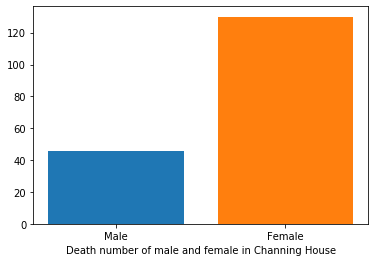

In [7]:
#(d)Visualize the number of male vs female who died in the Channing house
death_num = dataset.cens[dataset.cens == 1]
male_death = [len(death_num[dataset.sex == 'Male'])]
female_death = [len(death_num[dataset.sex == 'Female'])]
plt.bar('Male', male_death)
plt.bar('Female', female_death)
plt.xlabel('Death number of male and female in Channing House')


Text(0.5, 0, 'Number of male vs female who left the Channing House before July 1, 1975')

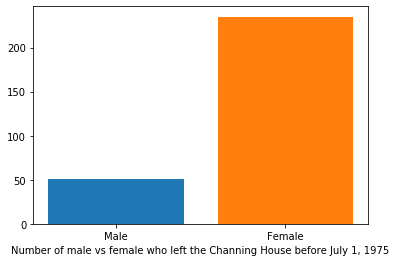

In [8]:
#(e)Visualize the number of male vs female who left the Channing house before July 1, 1975
left = dataset.cens[dataset.cens == 0]
male = [len(left[dataset.sex == 'Male'])]
female = [len(left[dataset.sex == 'Female'])]
plt.bar('Male', male)
plt.bar('Female', female)
plt.xlabel('Number of male vs female who left the Channing House before July 1, 1975')


In [10]:
#(f)Compute the rate of female who died in the Channing house. 
death_female = dataset.cens[dataset.cens == 1]
female = len(death_female[dataset.sex == 'Female'])
death_rate = female/len(dataset)*100.0
print("The rate of female who died in the Channing House is: ",death_rate)

The rate of female who died in the Channing House is:  28.13852813852814


In [11]:
#(g)Compute the rate of male who died in the Channing house.  
death_male = dataset.cens[dataset.cens == 1]
male = len(death_male[dataset.sex == 'Male'])
rate_male = male/len(dataset)*100.0
print("The rate of male who died in the Channing House is: ",rate_male)

The rate of male who died in the Channing House is:  9.956709956709958


In [13]:
#(h)Normalize the dataset using minmax normalization method. 
channing = dataset[['entry', 'exit', 'time', 'cens']]
normalized = (channing-channing.min())/(channing.max()-channing.min())
print(normalized.describe())

            entry        exit        time        cens
count  462.000000  462.000000  462.000000  462.000000
mean     0.424764    0.486031    0.586390    0.380952
std      0.170317    0.171553    0.352397    0.486147
min      0.000000    0.000000    0.000000    0.000000
25%      0.297297    0.376744    0.255474    0.000000
50%      0.411548    0.495349    0.598540    0.000000
75%      0.547912    0.590698    1.000000    1.000000
max      1.000000    1.000000    1.000000    1.000000


In [15]:
#(i)Apply PCA on the dataset. 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
dataset_features = ['entry', 'exit', 'time']

x = dataset.loc[:, dataset_features].values
y = dataset.loc[:,['cens']].values
# Standardizing the dataset_features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
x_PCA = pca.fit(x).transform(x)

data_transformed = pd.DataFrame(x, columns = dataset_features)

principal_DataFrame = pd.DataFrame(data = x_PCA, columns = ['PCA 1', 'PCA 2'])

print("\nTransformed data in original dimension:\n")
print(data_transformed.head())

print("\n\nProjected data in reduced dimesions: \n")
print(principal_DataFrame.head())


Transformed data in original dimension:

      entry      exit      time
0 -1.789024 -1.044857  0.967620
1  1.648107  1.927130  0.573642
2 -0.720336 -0.230614  0.677320
3  0.131726 -0.393463 -0.794912
4 -0.619244 -0.040624  0.822470


Projected data in reduced dimesions: 

      PCA 1     PCA 2
0 -1.773915 -1.442860
1  2.596197 -0.137520
2 -0.524843 -0.869119
3 -0.340135  0.829666
4 -0.293842 -0.987536


In [ ]:
#(j) Submitted
#Thank You!